In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from statistics import variance

# problem5


In [39]:
r = np.random.rand(500,251)-0.5
np.array(r)
print(r)

[[-0.15611925 -0.4745652   0.30577188 ... -0.36317608 -0.15062406
  -0.06471013]
 [ 0.38082035  0.12417022 -0.45904893 ...  0.37856916  0.28082364
  -0.12585857]
 [-0.08535981  0.46458563  0.26976096 ...  0.41556145  0.1893569
  -0.12502644]
 ...
 [ 0.03357713  0.02780967  0.35028722 ...  0.42195973  0.4651285
   0.04580954]
 [-0.3622153   0.36982129 -0.33107953 ...  0.15784654  0.22631584
   0.04892994]
 [ 0.18681436  0.09314918 -0.26595468 ... -0.27089112  0.20515214
  -0.18582923]]


In [40]:
np.array(r)

array([[-0.15611925, -0.4745652 ,  0.30577188, ..., -0.36317608,
        -0.15062406, -0.06471013],
       [ 0.38082035,  0.12417022, -0.45904893, ...,  0.37856916,
         0.28082364, -0.12585857],
       [-0.08535981,  0.46458563,  0.26976096, ...,  0.41556145,
         0.1893569 , -0.12502644],
       ...,
       [ 0.03357713,  0.02780967,  0.35028722, ...,  0.42195973,
         0.4651285 ,  0.04580954],
       [-0.3622153 ,  0.36982129, -0.33107953, ...,  0.15784654,
         0.22631584,  0.04892994],
       [ 0.18681436,  0.09314918, -0.26595468, ..., -0.27089112,
         0.20515214, -0.18582923]])

## sample covariance matrix 

In [43]:
omega=[]
for i in range(500):
    ri=np.mean(r[i])
    omega.append(r[i]-[ri]*251)
omega=np.array(omega)
omega_hat=omega.dot(np.transpose(omega))/(251-1)
print(omega_hat)

[[ 0.08709549 -0.00414637  0.00165724 ...  0.00564544  0.00080863
  -0.00167339]
 [-0.00414637  0.0934477  -0.00287862 ...  0.00111972  0.00048201
  -0.00640659]
 [ 0.00165724 -0.00287862  0.08654813 ...  0.00228995  0.00121959
  -0.00109803]
 ...
 [ 0.00564544  0.00111972  0.00228995 ...  0.08798458 -0.00587193
  -0.00397412]
 [ 0.00080863  0.00048201  0.00121959 ... -0.00587193  0.08229929
  -0.00273374]
 [-0.00167339 -0.00640659 -0.00109803 ... -0.00397412 -0.00273374
   0.08701492]]


## problem7 in midterm

In [27]:
#s&p500 2016 data
import pandas as pd
from datetime import datetime

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/Jay2251929205/Jiayi-Wang-ECON317/main/data/SPX30years.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column called 'Year' using the dt.year attribute
df['Year'] = df['Date'].dt.year

# Filter the DataFrame to only include rows where the 'Year' column is equal to 2016
df_2016 = df.loc[df['Year'] == 2016]

# Save the filtered DataFrame as a new CSV file
df_2016.to_csv('SPX30years_2016.csv', index=False)

df_2016.tail()



,Date,Close,Year
7193,2016-12-23,2263.790039,2016
7194,2016-12-27,2268.879883,2016
7195,2016-12-28,2249.919922,2016
7196,2016-12-29,2249.260010,2016
7197,2016-12-30,2238.830078,2016


In [28]:
df_2016.dtypes

Date     datetime64[ns]
Close           float64
Year              int64
dtype: object

In [29]:
Rm=df_2016['Close'].shift(1)-df_2016['Close']
Rm=Rm.dropna()
Rm=np.array(Rm)

In [30]:
sigmaRm=np.sqrt(variance(Rm))



In [31]:
def Coefficient(xlist,ylist,funlist):
    Y=np.transpose(ylist)
    X=[]
    for x in xlist:
        Xi=[]
        for fun in funlist:
            Xi.append(fun(x))
        X.append(Xi)
    X=np.array(X)
    Xt=np.transpose(X)
    coef=np.linalg.inv(Xt.dot(X)).dot(Xt).dot(Y)
    return coef

In [36]:
beta=[]
sigma=[]

funlist=[lambda x:1, lambda x:x]
for i in range(500):
    coef=Coefficient(Rm,r[i],funlist)
    beta.append(coef[1])
    e=[]
    for j in range(251):
        e.append(r[i][j]-coef[0]-coef[1]*Rm[j])
    sigma.append([0]*(i)+[np.var(e)]+[0]*(499-i))
beta=np.array(beta)
sigma=np.array(sigma)

omega=(sigmaRm**2)*beta.dot(np.transpose(beta))+sigma
omegainv=np.linalg.inv(omega)
ones=np.array([[1]]*500)
w=omegainv.dot(ones).dot(np.linalg.inv(np.transpose(ones).dot(omegainv).dot(ones)))

In [45]:
omega



array([[-0.1784268 , -0.49687275,  0.28346433, ..., -0.38548363,
        -0.17293162, -0.08701768],
       [ 0.38527427,  0.12862415, -0.454595  , ...,  0.38302308,
         0.28527756, -0.12140464],
       [-0.03934016,  0.51060529,  0.31578061, ...,  0.4615811 ,
         0.23537656, -0.07900679],
       ...,
       [-0.00495009, -0.01071754,  0.31176001, ...,  0.38343251,
         0.42660128,  0.00728232],
       [-0.3718626 ,  0.360174  , -0.34072683, ...,  0.14819924,
         0.21666855,  0.03928265],
       [ 0.18689507,  0.0932299 , -0.26587397, ..., -0.27081041,
         0.20523285, -0.18574851]])

In [44]:
np.linalg.inv(omega_hat)

array([[ 1.45139457e+15,  2.94227755e+16,  3.79824006e+15, ...,
         1.30760589e+16,  7.57551118e+15,  3.56960818e+15],
       [ 1.61746417e+16, -2.32210375e+16,  2.57150384e+15, ...,
        -3.42853840e+16, -3.12533257e+16, -3.39729723e+16],
       [ 1.24304163e+16,  3.24296666e+16,  1.64969204e+16, ...,
         1.85059235e+16,  8.47940087e+15,  1.83401031e+15],
       ...,
       [-1.56829251e+15, -2.94468386e+16, -1.08733444e+16, ...,
        -1.87390558e+16, -6.48448855e+15, -3.63408179e+15],
       [ 9.42887689e+15,  1.10885635e+17,  8.12989084e+15, ...,
         7.62178526e+16,  3.08094882e+16,  3.79679590e+16],
       [ 6.43759958e+15, -6.58016116e+16, -5.22210541e+15, ...,
        -5.31875696e+16, -3.21913891e+16, -2.35486472e+16]])

# Problem6

In [46]:
def count_large(n):
    p=10
    m=500
    beta=np.random.uniform(0,1,(n,p))
    f=np.random.normal(0,1,(n,p,m))
    epsilon=np.random.normal(0,1,(n,m))
    fReshape=f[:,0,:].reshape(1,n*m)
    for i in range(1,p):
        fReshape=np.r_[fReshape,f[:,i,:].reshape(1,n*m)]
    E=np.cov(fReshape)
    gamma=np.cov(epsilon)
    Omega=np.matmul(np.matmul(beta,E),beta.T)+gamma
    Eigv=np.linalg.eigvals(Omega)
    threshold=np.mean(Eigv)
    count=np.count_nonzero(Eigv>=threshold)
    return count

In [47]:
counts=[]
for i in range(5,500):
    counts.append(count_large(i))

In [49]:
async def count_large_p(p):
    m=500
    n=15*p
    beta=np.random.uniform(0,1,(n,p))
    f=np.random.normal(0,1,(n,p,m))
    epsilon=np.random.normal(0,1,(n,m))
    fReshape=f[:,0,:].reshape(1,n*m)
    for i in range(1,p):
        fReshape=np.r_[fReshape,f[:,i,:].reshape(1,n*m)]
    E=np.cov(fReshape)
    gamma=np.cov(epsilon)
    Omega=np.matmul(np.matmul(beta,E),beta.T)+gamma
    Eigv=np.linalg.eigvals(Omega)
    threshold=np.mean(Eigv)
    count=np.count_nonzero(Eigv>=threshold)
    print(f"p={p} is running")
    return count
    print(f"p={p} is done")

In [51]:
import asyncio
count_p=asyncio.gather(*(count_large_p(i) for i in range(10,100)))
count_p

<_GatheringFuture pending>

p=10 is running
p=11 is running
p=12 is running
p=13 is running
p=14 is running
p=15 is running
p=16 is running
p=17 is running
p=18 is running
p=19 is running
p=20 is running
p=21 is running
p=22 is running
p=23 is running
p=24 is running
p=25 is running
p=26 is running
p=27 is running
p=28 is running
p=29 is running
p=30 is running
p=31 is running
p=32 is running
p=33 is running
p=34 is running
p=35 is running
p=36 is running
p=37 is running
p=38 is running
p=39 is running
p=40 is running
p=41 is running
p=42 is running
p=43 is running
p=44 is running
p=45 is running
p=46 is running
p=47 is running
p=48 is running
p=49 is running
p=50 is running
p=51 is running
p=52 is running
p=53 is running
p=54 is running
p=55 is running
p=56 is running
p=57 is running
p=58 is running
p=59 is running
p=60 is running
p=61 is running
p=62 is running
p=63 is running
p=64 is running
p=65 is running
p=66 is running
p=67 is running
p=68 is running
p=69 is running
p=70 is running
p=71 is running
p=72 is 

p=99 is running


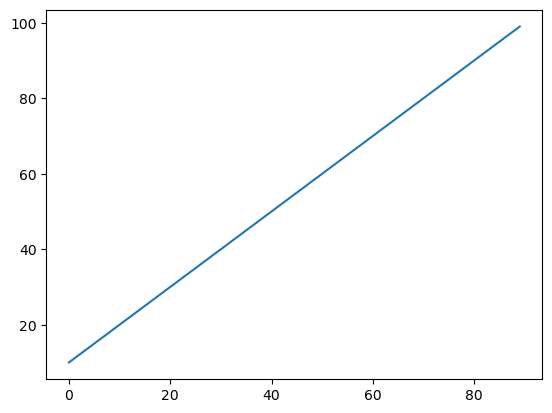

In [52]:
plt.plot(count_p.result())
